In [3]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
%matplotlib inline

# Load the data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [5]:
# Preview data
print("Train Set:")
display(train_df.head())

print("\nTest Set:")
display(test_df.head())

Train Set:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Test Set:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Check for missing values
print("Missing values in Train Set:")
print(train_df.isnull().sum())

Missing values in Train Set:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
print("Missing values in Test Set:")
print(test_df.isnull().sum())

Missing values in Test Set:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


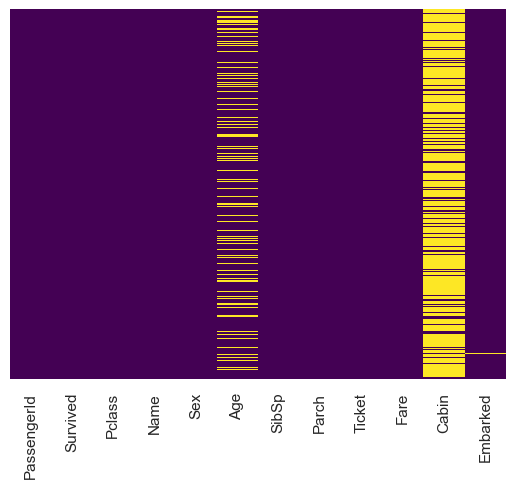

In [8]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [9]:
# How many survived vs not
train_df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [10]:
# Compare survival by sex
train_df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [11]:
# Compare survival by Pclass
train_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

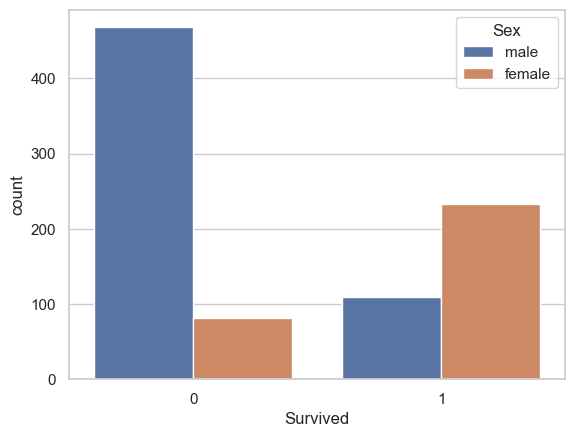

In [12]:
# Survival by gender
sns.countplot(data=train_df, x='Survived', hue='Sex')
plt.show()

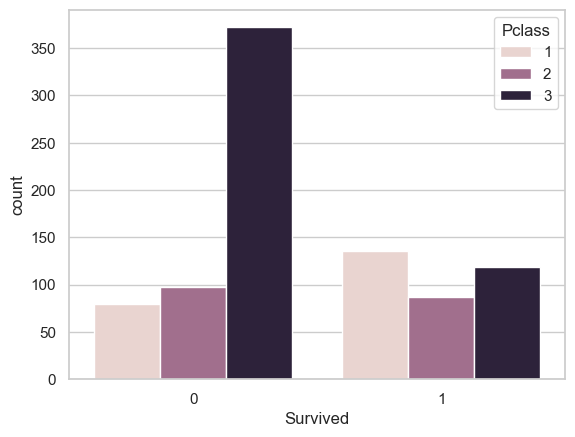

In [13]:
# Survival by class
sns.countplot(data=train_df, x='Survived', hue='Pclass')
plt.show()

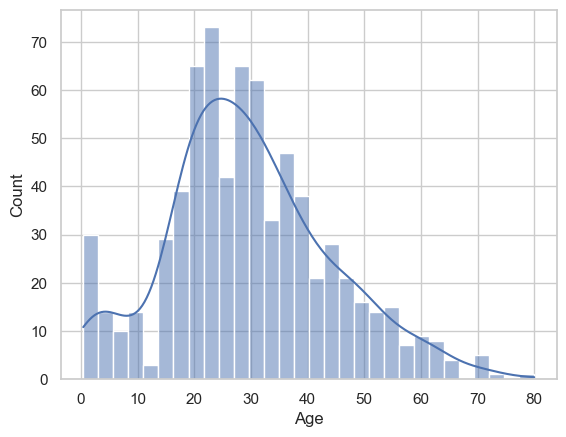

In [14]:
# Age distribution
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.show()

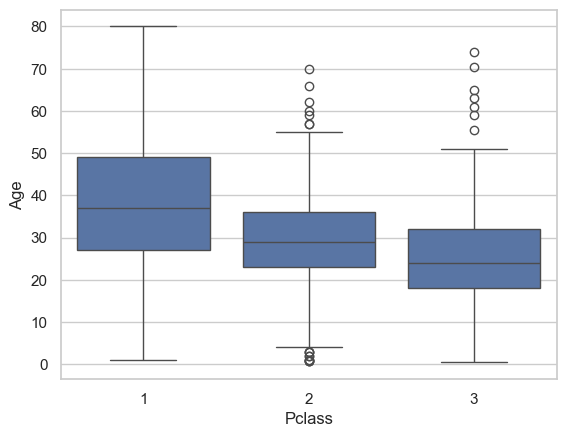

In [15]:
# Box plot of Age by Pclass
sns.boxplot(data=train_df, x='Pclass', y='Age')
plt.show()

In [16]:
#Females had a higher survival rate
#Upper class (Pclass = 1) passengers survived the most and Pclass=3 passengerss died the most.
#There are missing values in Cabin, Age, and Embarked.
#Wealthier passengers in the higher classes tend to be older

In [17]:
train_df.groupby('Age')['Survived'].mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

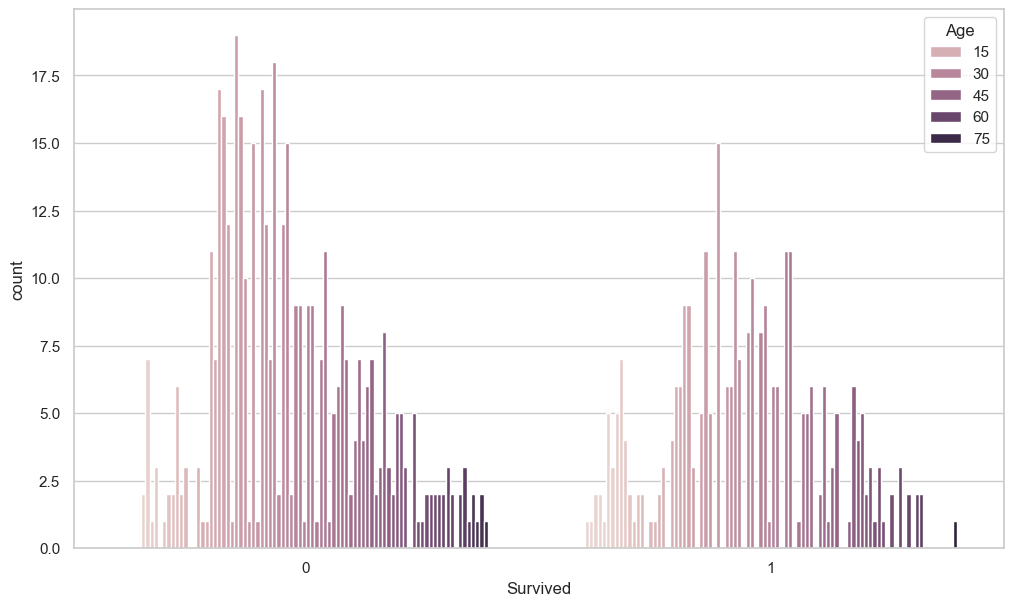

In [18]:
plt.figure(figsize=(12, 7))
sns.countplot(data=train_df, x='Survived', hue='Age')
plt.show()

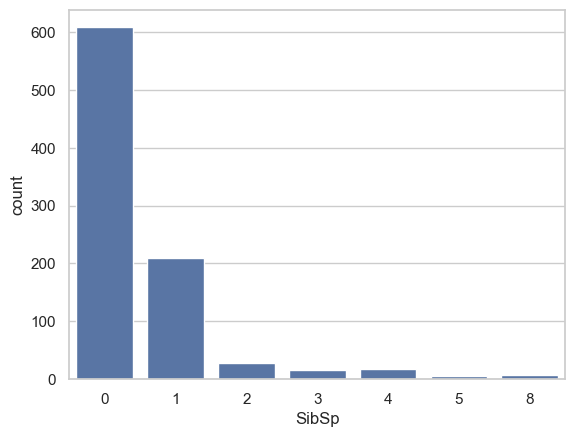

In [19]:
sns.countplot(x='SibSp',data=train_df)
plt.show()

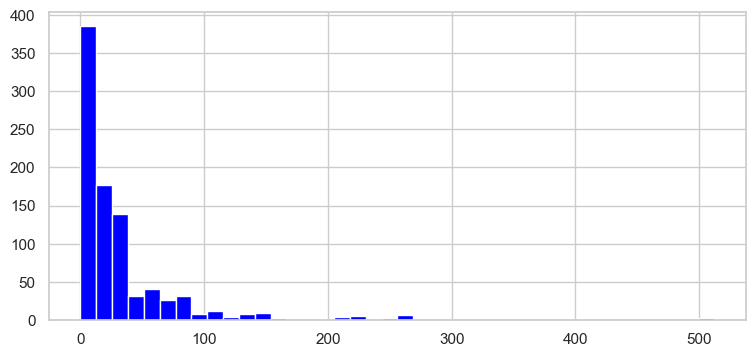

In [20]:
train_df['Fare'].hist(color='blue',bins=40,figsize=(9,4))
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# 1. Drop columns we won’t use
train_df = train_df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'])

In [23]:
# 2. Fill missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7720\1141559540.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7720\1141559540.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [24]:
# 3. Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

In [25]:
# 4. Define features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [26]:
# 5. Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


In [28]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [30]:
train_scores = []
val_scores = []
n_estimators_range = range(10, 210, 10)

In [31]:
for n in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)

In [32]:
train_acc = accuracy_score(y_train, clf.predict(X_train))
val_acc = accuracy_score(y_val, clf.predict(X_val))

In [33]:
train_scores.append(train_acc)
val_scores.append(val_acc)

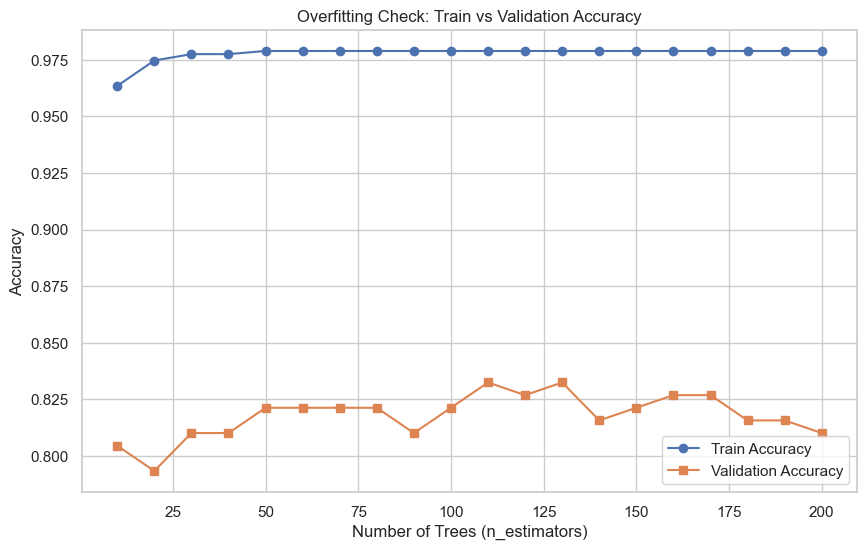

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_scores = []
val_scores = []
n_estimators_range = range(10, 210, 10)

for n in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)

    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)

    train_scores.append(train_acc)
    val_scores.append(val_acc)

# Plotting training vs validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, val_scores, label='Validation Accuracy', marker='s')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Overfitting Check: Train vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
#Some Overfitting is Present
#The model is slightly overfitting — it performs significantly better on training data than on validation data.
#But not extreme. A gap of ~0.15 between train and validation is common for decision tree models like Random Forests

In [36]:
# Rebuild features (X) and target (y) from the cleaned train_df
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

In [37]:
# Train a tuned model on the full dataset
from sklearn.ensemble import RandomForestClassifier

final_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,            # Controls tree size (reduce overfitting)
    min_samples_leaf=4,     # Requires at least 4 samples to make a leaf
    random_state=42
)

final_model.fit(X, y)  # Train on all cleaned training data

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [39]:
print(test_df.columns)
print(test_df.isnull().sum())

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [41]:
print(test_df_cleaned.columns.tolist())

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [42]:
test_df_cleaned = test_df.copy()

# Drop unused columns
test_df_cleaned.drop(columns=['Cabin', 'Ticket', 'Name'], errors='ignore', inplace=True)

# Fill missing values
test_df_cleaned['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df_cleaned['Fare'].fillna(train_df['Fare'].median(), inplace=True)
# No need to fill Embarked, already clean

# Encode categorical variables
test_df_cleaned = pd.get_dummies(test_df_cleaned, columns=['Sex', 'Embarked'], drop_first=True)

# Add missing columns to match training set
for col in X.columns:
    if col not in test_df_cleaned.columns:
        test_df_cleaned[col] = 0

# Reorder columns to match training set
test_df_cleaned = test_df_cleaned[X.columns]


C:\Users\user\AppData\Local\Temp\ipykernel_7720\909837515.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df_cleaned['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7720\909837515.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [43]:
predictions = final_model.predict(test_df_cleaned)

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

submission.to_csv('submission.csv', index=False)